In [29]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab

# File to Load path
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)
print(city_df.shape)
print(ride_df.shape)

# Combine the data into a single dataset
pyber = pd.merge(city_df, ride_df, on="city", how="left")

# Display the data table for preview
#print(pyber.shape)
pyber.head()



(120, 3)
(2375, 4)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [30]:
(pyber.driver_count).min()
(pyber.driver_count).max()
city_df.min()

city            Amandaburgh
driver_count              1
type                  Rural
dtype: object

## Bubble Plot of Ride Sharing Data

In [31]:
# Obtain the x and y coordinates for each of the three city types

pyber_grouped=pyber.groupby("city")

#Average Purchase Value by City
pyber_grouped_avg=pyber_grouped['fare'].mean()
pyber_grouped_avg.head()

pyber_grouped_num_drivers=pyber_grouped['driver_count'].mean()
pyber_grouped_num_drivers.head()

#Total rides per city
pyber_grouped_count=pyber_grouped['fare'].count()

# pyber_grouped_count.describe()


In [53]:
#Put together a dataframe from the groupby objects - Can't figure this out!
test = pyber_grouped.aggregate(np.sum)
test

# test_avg = pyber_grouped_avg.aggregate(np.sum)
# print(test_avg)

# unique_city=test["city"].unique()
# unique_city

rides_per_city=pyber["city"].value_counts()
rides_per_city.head()


West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
Name: city, dtype: int64

In [52]:
type(test)

pandas.core.frame.DataFrame

In [51]:
type(rides_per_city)

pandas.core.series.Series

Text(42,38,'Circle Size Correlates with Drivers per City:')

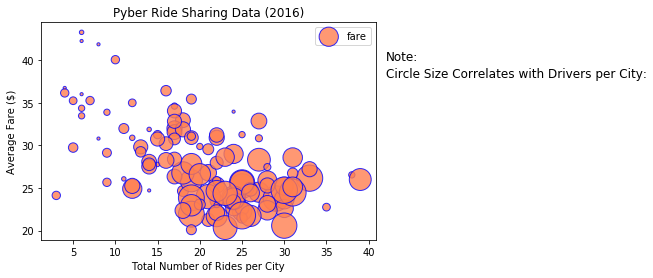

In [33]:
# Build the scatter plots for each city types

color_dict = { 'Urban':'coral', 'Rural':'gold', 'Suburban':'lightskyblue'}

plt.scatter(pyber_grouped_count, pyber_grouped_avg, marker="o", edgecolors="blue", 
            color=[color_dict[i] for i in pyber['type']],
            s=((pyber_grouped_num_drivers)*10), alpha=0.8)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
# plt.xlim(-0.75, len(gyms)-.25)
# plt.ylim(0, max(members) + 5)


# Create a legend
# plt.legend(loc="best")
#plt.legend(handles=[Urban, Suburban, Rural], loc="best")
pylab.legend(loc='upper right')

# Incorporate a text label regarding circle size
plt.text(42, 40, s="Note:", fontsize=12)
plt.text(42, 38, s="Circle Size Correlates with Drivers per City:", fontsize=12)

# Save Figure


In [34]:
# for name,group in pyber_grouped:
#     print (name)
#     print (group)

# print (pyber_grouped.get_group("Barajasview"))

# print (pyber_grouped['fare'].agg([np.sum, np.mean, np.std]))

## Total Fares by City Type

In [35]:
pyber_grouped[["city","fare", "type"]].head()

,city,fare,type
0,Richardfort,13.93,Urban
1,Richardfort,14.00,Urban
2,Richardfort,17.92,Urban
3,Richardfort,10.26,Urban
4,Richardfort,23.00,Urban
28,Williamsstad,19.62,Urban
29,Williamsstad,35.58,Urban
30,Williamsstad,33.72,Urban
31,Williamsstad,26.81,Urban
32,Williamsstad,4.68,Urban


In [27]:
# Calculate Total Fare by City Type

print(test)

# Build Pie Chart

# Save Figure


                      driver_count     fare          ride_id
city                                                        
Amandaburgh                    216   443.55   96468054851003
Barajasview                    572   557.31  102893297406279
Barronchester                  176   582.76   71372735666520
Bethanyland                    396   593.21  105165903035418
Bradshawfurt                    70   400.64   37352940220451
Brandonfort                    190   673.31  103161250476129
Carriemouth                   1404   764.49  139991078502567
Christopherfurt               1107   661.55  123722295302015
Colemanland                    506   679.68  113425702090831
Davidfurt                      391   543.93   77775872278918
Deanville                      931   491.01   93128654434912
East Aaronbury                  63   230.95   56884401202160
East Danielview                374   536.53   65372180460678
East Kaylahaven               1885   688.98  134119599577943
East Kentstad           

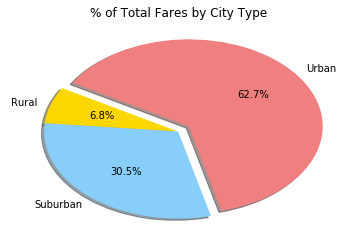

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


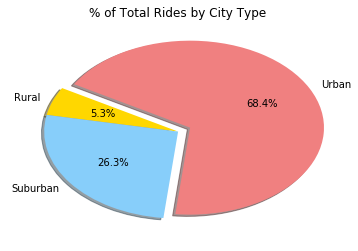

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


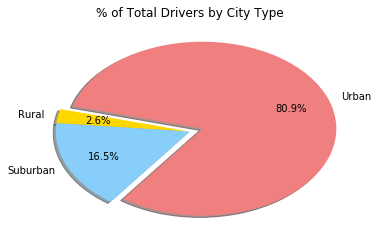

In [6]:
# Show Figure
plt.show()